## A practical intro to unsupervised machine learning
K-means is one of the oldest and simplest clustering algorithms. Clustering is a form of ''unsupervised'' machine learning, in which an algorithm is not ''trained'' to find known patterns, but is let loose to find similarities and discover previously unknown patterns.  <br>
<br>
(1) generate signals, and look at their properties (sort?) <br>
(2) cluster them with k-means <br>
(3) look at the clusters.. what do they mean ? <br> 
(4) how might the cluster information be incorporated into sonification or animation? <br>



In [1]:
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA as pca
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm


## Generate fake data
We'll generate fake data by sampling a statistical distribution of some property, using a "pareto distribution": <br>
https://en.wikipedia.org/wiki/Pareto_distribution <br>
<br>
The probability of some property $x$, $p(x)$ is given by: <br>
$p(x) = \frac{am^a}{x^{a+1}}$ <br>
where a is the ''shape'' and $m$ is the ''scale''.  <br>
<br>
First we'll try just one sampling algorithm with constant $a$ and $m$, <br>
and cluster the results, and then try building a data set with underlying families. <br>


[1.26540927 1.2010289  1.0471567  1.1157609  1.07158347 1.20165248
 1.0111389  1.25424348 2.02611469 1.09916688 1.06200526 1.64574067
 1.01424284 1.38458992 1.24080618 2.1354044  1.02710844 1.09414045
 1.02522208 1.14391259 1.0366591  1.01588051 1.2273195  1.02142406
 1.06760341 1.27322926 1.78196452 2.17263988 1.04795279]


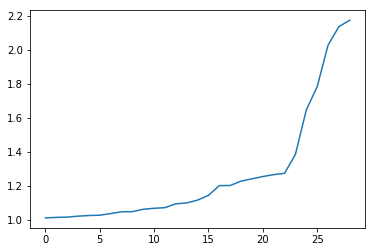

In [2]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html

nv = 29
a = 5
m = 1

s = (np.random.pareto(a, nv) + 1) * m
print(s)

#plt.plot(s)
#plt.plot(np.sort(s))
plt.plot(np.sort(s))

In [6]:
n_data = 200

# pareto distribution parameters
n_p = 27
a_p = 3
m_p = 1

datamat = np.zeros((n_p,n_data))

for i in range(n_data):
    s = np.sort((np.random.pareto(a_p, n_p) + 1) * m_p)
    datamat[:,i] = s
    
print(np.shape(datamat))
X = np.transpose(datamat)
print(np.shape(X))

(27, 200)
(200, 27)


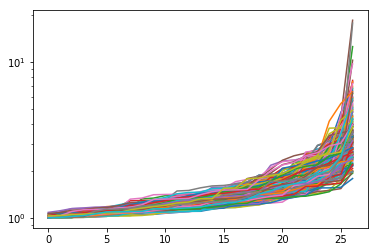

In [7]:
for i in range(n_data):
    #plt.plot(datamat[:,i])
    plt.semilogy(datamat[:,i])


In [15]:
# Run K-means :
# shape of X = [n_samples, n_features] 
# so each data vector -- each different sample -- is a row, 
# and each of its columns are the "elements" (in python terminology) 
# or "features" in machine learning terminology. 

nClusters = 4
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(X)
clusterlabels = np.squeeze(np.asarray(kmeans.labels_))
centroids = np.asarray(kmeans.cluster_centers_)

print(np.shape(centroids))
print(kmeans)
print(clusterlabels)
print(np.shape(clusterlabels))

(4, 27)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
[3 3 1 0 0 3 0 3 0 3 3 0 2 3 3 2 3 3 3 3 0 0 0 0 0 0 3 3 2 3 3 3 0 3 3 3 0
 3 2 0 3 0 3 3 0 3 3 3 0 0 0 3 0 3 0 0 3 0 3 0 0 3 3 0 3 3 3 3 0 3 0 0 3 2
 0 0 2 3 3 3 3 3 0 2 3 0 2 3 3 2 0 3 0 3 0 3 0 3 3 3 0 2 3 0 0 1 3 0 0 2 2
 2 3 2 0 3 3 3 0 3 3 0 3 0 3 3 0 0 2 0 3 3 3 3 0 3 3 0 0 3 3 2 0 0 3 3 2 0
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 2 3 3 3 3 2 3 3 0 0 3 1 0 3 0 3 0 3 3
 0 2 3 0 2 0 3 0 3 3 2 0 3 0 0]
(200,)


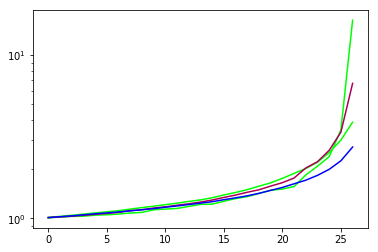

In [18]:
# color by cluster number: 
#colmap = cm.tab20b
colmap = cm.brg
cval = np.linspace(0.0,1.0,nClusters)

# for i in range(20):
#     ind = np.int(clusterlabels[i])
#     c = colmap(cval[ind])
#     plt.semilogy(X[i,:], color=c)

for i in range(nClusters):
    ind = np.int(clusterlabels[i]) 
    c = colmap(cval[ind])    
    plt.semilogy(centroids[i,:], color=c)

## Other ways of representing the data: 
PCA <br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [25]:
pca = PCA(n_components=2)
Xt = np.transpose(X)
pcamat = np.asarray(pca.fit(Xt).components_)
pcamat
print()
print(type(pcamat))
print(np.shape(pcamat))


<class 'numpy.ndarray'>
(2, 200)


Text(0,0.5,'principle component 2')

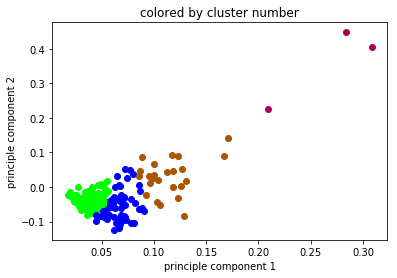

In [26]:
#plt.plot(pcamat[0,:],pcamat[1,:],'o')

for i in range(n_data):
    ind = np.int(clusterlabels[i])
    c = colmap(cval[ind]) 
    plt.plot(pcamat[0,i],pcamat[1,i],'o',color=c)
    
plt.title('colored by cluster number')
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')

## now build in some underlying known statistical variations to the dataset

In [27]:
# different slopes and scalars

def sample_a_b(mu1=.5,mu2=.5,var1=.005,var2=.005,cov=0,n=1000):
    mean = np.array([mu1,mu2])
    cov = np.array([[var1,cov],[cov,var2]])
    sample = np.empty([n,2])
    size = 0
    while size<n:
        x = np.random.multivariate_normal(mean,cov)
        if all(np.logical_and(x>0,x<1)):
            sample[size,:]=x
            size+=1
    return(sample)


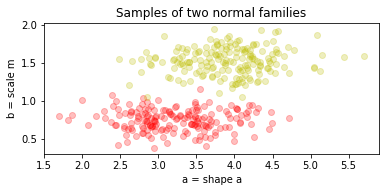

(179, 2) (179, 2)


In [28]:
# parameter tuning here
# mu = mean value of gaussian
# 1 = a_p (the shape parameter)
# 2 = m_p (the scaling parameter)

# Family A
mu1_A = 0.4
mu2_A = 0.4 # 0.6
var1_A = var2_A = .005

# Family B
mu1_B = 0.5
mu2_B = 0.6 #.3
var1_B = var2_B = .005

size = 179

A = sample_a_b(mu1_A,mu2_A,var1_A,var2_A,n=size)
B = sample_a_b(mu1_B,mu2_B,var1_B,var2_B,n=size)

# scale by real ranges: 
a_A = 8
m_A = 1.9
Ar = np.zeros(np.shape(A))
Ar[:,0] = A[:,0]*a_A
Ar[:,1] = A[:,1]*m_A

a_B = 8
m_B = 2.5
Br = np.zeros(np.shape(B))
Br[:,0] = B[:,0]*a_B
Br[:,1] = B[:,1]*m_B


# plotting
plt.axes().set_aspect('equal')
plt.plot(Ar[:,0],Ar[:,1],'ro',alpha=0.25)
plt.plot(Br[:,0],Br[:,1],'yo',alpha=0.25)
# plt.xlim([-0.1,1.1])
# plt.ylim([-0.1,1.1])
plt.xlabel('a = shape a')
plt.ylabel('b = scale m')
plt.title('Samples of two normal families')
# red = mpatches.Patch(color='red', label='Family A')
# yellow = mpatches.Patch(color='y', label='Family B')
# plt.legend(handles=[red, yellow])
plt.show()

print(np.shape(Ar),np.shape(Br))

In [29]:
# now generate the data from the sets of parameters ! 
n_p = 48
n_data = len(Ar)
datamat_A = np.zeros((n_data,n_p))

for i in range(n_data):
    a = Ar[i,0]
    m = Ar[i,1]

    s = np.sort((np.random.pareto(a, n_p) + 1) * m)
    datamat_A[i,:] = s
    
n_data = len(Br)
datamat_B = np.zeros((n_data,n_p))

for i in range(n_data):
    a = Br[i,0]
    m = Br[i,1]

    s = np.sort((np.random.pareto(a, n_p) + 1) * m)
    datamat_B[i,:] = s
    


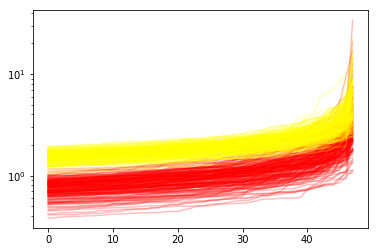

In [30]:
for i in range(len(datamat_A)):
    plt.semilogy(datamat_A[i,:],color='red',alpha=0.25)
for i in range(len(datamat_B)):
    plt.semilogy(datamat_B[i,:],color='yellow',alpha=0.25)

In [31]:
# merge the two families and mix them up randomly
datamat = np.vstack((datamat_A,datamat_B))
print(np.shape(datamat))
print(datamat[0,-1])
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
np.random.shuffle(datamat)
print(datamat[0,-1])

(358, 48)
2.551239099569946
5.827960766916828


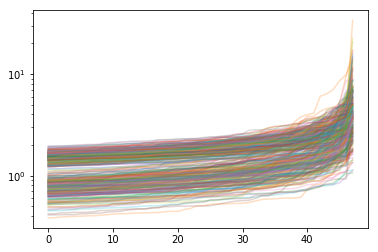

In [32]:
for i in range(len(datamat)):
    plt.semilogy(datamat[i,:],alpha=0.25)

In [33]:
#X = np.transpose(datamat)
X = datamat 
print(np.shape(X))

# Run K-means: 
nClusters = 2
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(X)
clusterlabels = np.asarray(kmeans.labels_)
centroids = np.asarray(kmeans.cluster_centers_)


print(kmeans)
print(clusterlabels)
print(np.shape(clusterlabels))
print(np.shape(centroids))

(358, 48)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
[0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0
 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0
 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1]
(358,)
(2, 48)


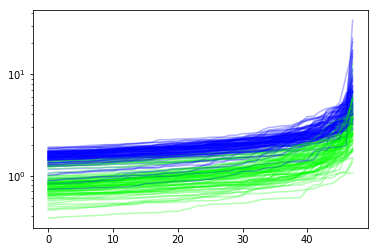

In [34]:
# color by cluster number: 
#colmap = cm.tab20b
colmap = cm.brg
cval = np.linspace(0.0,1.0,nClusters)

for i in range(n_data):
    ind = np.int(clusterlabels[i])
    c = colmap(cval[ind])
    plt.semilogy(X[i,:], color=c,alpha=0.3)


In [35]:
pca = PCA(n_components=3)
Xt = np.transpose(X)
pcamat = np.asarray(pca.fit(Xt).components_)
pcamat
print()
print(type(pcamat))
print(np.shape(pcamat))


<class 'numpy.ndarray'>
(3, 358)


Text(0,0.5,'principle component 2')

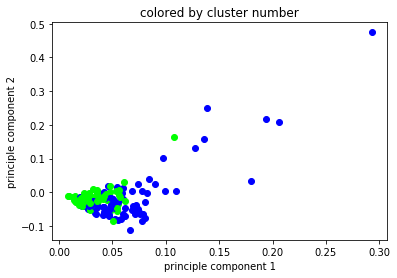

In [36]:
#plt.plot(pcamat[0,:],pcamat[1,:],'o')

for i in range(n_data):
    ind = np.int(clusterlabels[i])
    c = colmap(cval[ind]) 
    plt.plot(pcamat[0,i],pcamat[1,i],'o',color=c)
    
plt.title('colored by cluster number')
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')

## Text as data
There are a range of ways of converting text strings to numeric values that can be used in k-means. <br>
<br>
https://stackoverflow.com/questions/8452961/convert-string-to-ascii-value-python <br>

In [290]:
s1 = 'animal'

list1 = list(bytes(b'animal'))
print(list1)
#or
list2 = [ord(c) for c in s1]
print(list2)

[97, 110, 105, 109, 97, 108]
[97, 110, 105, 109, 97, 108]


In [291]:
s2 = 'we are animals but not pythons'
list3 = [ord(c) for c in s2]
print(list3)

# what ascii value represents a space ? 

[119, 101, 32, 97, 114, 101, 32, 97, 110, 105, 109, 97, 108, 115, 32, 98, 117, 116, 32, 110, 111, 116, 32, 112, 121, 116, 104, 111, 110, 115]
